# <span style="color:yellow">Escenario 1: </span> 
## Simulación de Monte Carlo de una persona sin intercambio

In [1]:
#Algoritmo para un sujeto sin intercambio. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from collections import defaultdict

#Definicion variables
numero_simulaciones=10

#Definir listas y otras variables

Resultados=[]
Costo_tot_sobres=[]


for i in range(numero_simulaciones):
    estampas_totales = 670
    costo_sobre=6.75
    costo_libro=15
    sobres_comprados = 0

    album = []
    estampas_faltantes = estampas_totales - len(album)
    lista_repetidas = []
    intercambiables = len(lista_repetidas)



    def abrir_sobre(estampas_sobre=5):
        #Hace referencia a que las asignaciones de estas variables modifican las variables globales existentes (definidas fuera de la funcion)
        #Cada vez que se invoque la funcion abrir_sobre se esta modificando las variables globales
        global sobres_comprados,estampas_faltantes,intercambiables
        sobres_comprados +=1
        num_estampa= np.random.choice(np.arange(1, 671), size=estampas_sobre, replace=False)   

        for estampa in num_estampa:
            if estampa not in album:
                album.append(estampa)
            else:
                lista_repetidas.append(estampa)
        estampas_faltantes=estampas_totales-len(album)
        intercambiables = len(lista_repetidas)


    while estampas_faltantes>0:
        abrir_sobre()

    Resultados.append(sobres_comprados)
    Costo_tot_sobres.append(costo_sobre*sobres_comprados)

Sobres_prom=sum(Resultados[:])/numero_simulaciones

Costo_prom=sum(Costo_tot_sobres[:])/numero_simulaciones

Repe_prom=sum(lista_repetidas[:])/numero_simulaciones

# <span style="color:green">Resultados </span>

In [2]:
#Resultados=pd.Series(["-"])
sobres_prom_series = pd.Series([Sobres_prom])
Costo_prom_series = pd.Series([Costo_prom])
Repe_prom_series=pd.Series([Repe_prom])
df = pd.DataFrame({  "Promedio sobres": sobres_prom_series, "Costo promedio (Q)": Costo_prom_series, "Promedio repetidas": Repe_prom_series })
df
df.style.hide(axis="index").format("{:,.0f}")


In [3]:
serie_sobres_simulaciones=pd.Series(Resultados)
serie_costo_simulaciones=pd.Series(Costo_tot_sobres)
data_frame_simulaciones=pd.DataFrame({"Promedio sobres":serie_sobres_simulaciones,"Costo sobres":serie_costo_simulaciones})
#data_frame_simulaciones

# <span style="color:pink">Histograma de frecuencia de sobres promedio </span>

np.float64(936.0)

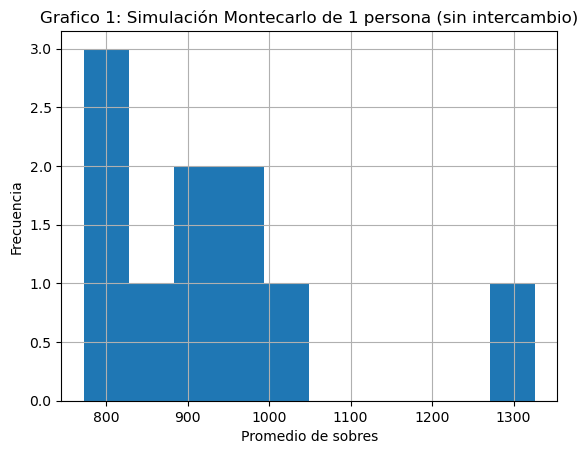

In [4]:
grafico1=data_frame_simulaciones["Promedio sobres"].hist()

grafico1.set_title("Grafico 1: Simulación Montecarlo de 1 persona (sin intercambio)")
grafico1.set_xlabel("Promedio de sobres")
grafico1.set_ylabel("Frecuencia")

data_frame_simulaciones["Promedio sobres"].mean()

# <span style="color:pink">Histograma de frecuencia de costo promedio </span>

np.float64(6318.0)

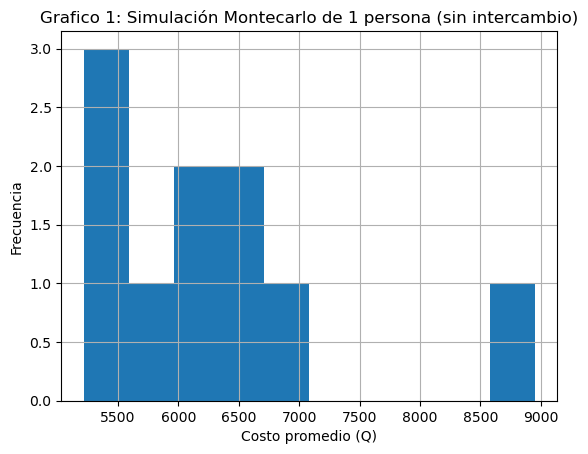

In [ ]:
grafico2=data_frame_simulaciones["Costo sobres"].hist()

grafico2.set_title("Grafico 1: Simulación Montecarlo de 1 persona (sin intercambio)")
grafico2.set_xlabel("Costo promedio (Q)")
grafico2.set_ylabel("Frecuencia")

data_frame_simulaciones["Costo sobres"].mean()